In [1]:
# import dependencies 
import pandas as pd
import numpy as np
from datetime import datetime

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# open csv file 
file = "consolidated_coin_data.csv"
df = pd.read_csv(file)
df.tail()

,Currency,Date,Open,High,Low,Close,Volume,Market Cap
13571,cardano,"Oct 05, 2017",0.021951,0.022154,0.020859,0.021489,"5,562,510","557,139,041"
13572,cardano,"Oct 04, 2017",0.020864,0.022806,0.020864,0.021931,"9,000,050","568,619,548"
13573,cardano,"Oct 03, 2017",0.025757,0.027425,0.020690,0.020816,"16,997,800","539,692,715"
13574,cardano,"Oct 02, 2017",0.024607,0.030088,0.019969,0.025932,"57,641,300","628,899,052"
13575,cardano,"Oct 01, 2017",0.021678,0.032226,0.017354,0.024969,"50,068,700",-


In [3]:
# check data types
df.dtypes

Currency       object
Date           object
Open          float64
High          float64
Low           float64
Close         float64
Volume         object
Market Cap     object
dtype: object

In [11]:
# convert date to datetime format
df["Date"] = pd.to_datetime(df["Date"])
df.tail()

,Currency,Date,Open,High,Low,Close,Volume,Market Cap
13571,cardano,2017-10-05,0.021951,0.022154,0.020859,0.021489,"5,562,510","557,139,041"
13572,cardano,2017-10-04,0.020864,0.022806,0.020864,0.021931,"9,000,050","568,619,548"
13573,cardano,2017-10-03,0.025757,0.027425,0.020690,0.020816,"16,997,800","539,692,715"
13574,cardano,2017-10-02,0.024607,0.030088,0.019969,0.025932,"57,641,300","628,899,052"
13575,cardano,2017-10-01,0.021678,0.032226,0.017354,0.024969,"50,068,700",-


In [17]:
# drop columns to show only date, close, and currency 
df_drop = df.drop(['Open', 'High', 'Low', 'Volume', 'Market Cap'], axis=1)
df_drop.head()

,Currency,Date,Close
0,ripple,2019-04-24,0.302318
1,ripple,2019-04-23,0.321222
2,ripple,2019-04-22,0.323934
3,ripple,2019-04-21,0.322449
4,ripple,2019-04-20,0.328476


In [22]:
# clean dataframe to contain the 6 currency exchanges 
cleaned_df = df_drop.loc[df['Currency'].isin(['ethereum', 'ripple', 'litecoin', 'bitcoin', 'eos', 'binance-coin'])]
cleaned_df.head()

,Currency,Date,Close
0,ripple,2019-04-24,0.302318
1,ripple,2019-04-23,0.321222
2,ripple,2019-04-22,0.323934
3,ripple,2019-04-21,0.322449
4,ripple,2019-04-20,0.328476


In [23]:
# create function to rename currency by abbreviation 
def rename(x):
    if "ethereum" in x: return("ETH")
    elif "ripple" in x: return("XRP")
    elif "litecoin" in x: return("LTC")
    elif "bitcoin" in x: return("BCC")
    elif "eos" in x: return ("EOS")
    elif "binance-coin" in x:return("BNC")
    else: return(x)

In [50]:
# apply function to new column called BTC
cleaned_df["BTC"]=cleaned_df["Currency"].apply(rename)
cleaned_df.head()

/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Currency,Date,Close,BTC
0,ripple,2019-04-24,0.302318,XRP
1,ripple,2019-04-23,0.321222,XRP
2,ripple,2019-04-22,0.323934,XRP
3,ripple,2019-04-21,0.322449,XRP
4,ripple,2019-04-20,0.328476,XRP


In [55]:
# remove Currency column
cleaned_df = cleaned_df.drop(["Currency"], axis=1)
cleaned_df.head()

,Date,Close,BTC
0,2019-04-24,0.302318,XRP
1,2019-04-23,0.321222,XRP
2,2019-04-22,0.323934,XRP
3,2019-04-21,0.322449,XRP
4,2019-04-20,0.328476,XRP


In [96]:
# select BTC by currency 
xrp_df = cleaned_df.loc[cleaned_df["BTC"] == "XRP"]
eth_df = cleaned_df.loc[cleaned_df["BTC"] == "ETH"]
ltc_df = cleaned_df.loc[cleaned_df["BTC"] == "LTC"]
bcc_df = cleaned_df.loc[cleaned_df["BTC"] == "BCC"]
eos_df = cleaned_df.loc[cleaned_df["BTC"] == "EOS"]
bnc_df = cleaned_df.loc[cleaned_df["BTC"] == "BNC"]

In [87]:
# check len of df 
xrp_df.count()

Date     2090
Close    2090
BTC      2090
dtype: int64

In [88]:
eth_df.count()

Date     1357
Close    1357
BTC      1357
dtype: int64

In [89]:
ltc_df.count()

Date     2188
Close    2188
BTC      2188
dtype: int64

In [90]:
bcc_df.count()

Date     2188
Close    2188
BTC      2188
dtype: int64

In [91]:
eos_df.count()

Date     663
Close    663
BTC      663
dtype: int64

In [98]:
bnc_df.count()

Date     639
Close    639
BTC      639
dtype: int64

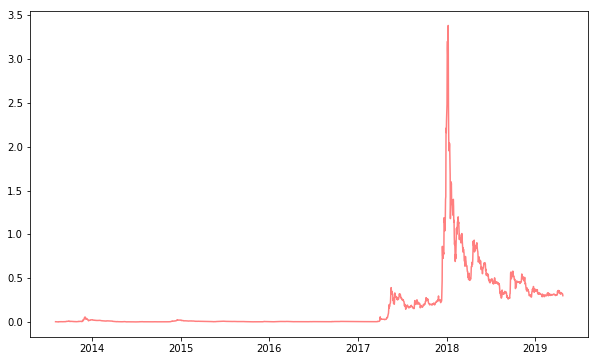

In [80]:
# example plot for XRP/ripple over time 
fig, ax = plt.subplots(figsize=(10,6))
x_axis = xrp_df["Date"]
xrp_plot = plt.plot(x_axis, xrp_df["Close"], color='r', alpha=0.5)

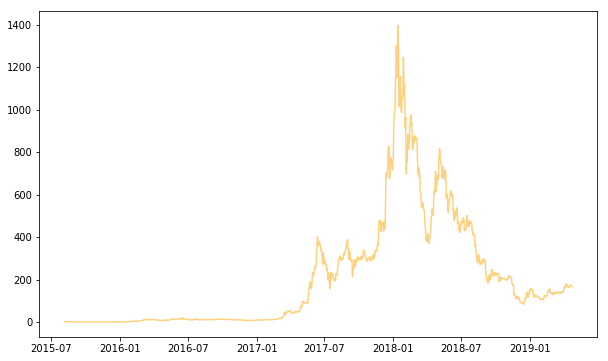

In [81]:
# example plot for ETH/ether over time 
fig, ax = plt.subplots(figsize=(10,6))
x_axis = eth_df["Date"]
eth_plot = plt.plot(x_axis, eth_df["Close"], color='orange', alpha=0.5)